In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona
import numpy as np 
def read_gpkg(fnm,layer='perimeter'):
    ''' read gpkg data
    op: 'perimeter', 'fireline', 'newfirepix'
    '''

    gdf = gpd.read_file(fnm,layer=layer)

    return gdf

In [72]:
# Path to your GeoPackage file
gpkg_path = "../Largefire/LargeFires_2020.gpkg"

# List all layers in the GeoPackage
layers = fiona.listlayers(gpkg_path)
print("Layers in GeoPackage:", layers)

# Inspect each layer
for layer in layers:
    gdf = gpd.read_file(gpkg_path, layer=layer)
    print(f"Structure of layer '{layer}':")
    print(gdf.dtypes)  # This prints the data types of each column
    print(gdf.head())  # This prints the first few rows for a quick look

Layers in GeoPackage: ['perimeter', 'fireline', 'newfirepix']
Structure of layer 'perimeter':
time             object
clat            float64
clon            float64
ftype             int64
n_pixels          int64
n_newpixels       int64
farea           float64
fperim          float64
flinelen        float64
duration        float64
pixden          float64
meanFRP         float64
year              int64
tst_month         int64
tst_day           int64
tst_ampm         object
ted_year          int64
ted_month         int64
ted_day           int64
ted_ampm         object
fireID            int64
geometry       geometry
dtype: object
                  time       clat        clon  ftype  n_pixels  n_newpixels  \
0  2020-08-01T00:00:00  33.991509 -116.935240      4        53           53   
1  2020-08-01T12:00:00  34.000390 -116.929311      4       103           50   
2  2020-08-02T00:00:00  34.031180 -116.863652      2       468          365   
3  2020-08-02T12:00:00  34.030323 -116.861985   

In [73]:
gdf_lf = read_gpkg(gpkg_path,layer='perimeter')
gdf_lf_FL = read_gpkg(gpkg_path,layer='fireline')
gdf_lf_NFP = read_gpkg(gpkg_path,layer='newfirepix')


In [84]:
# Specify the fireID you want to filter by
specific_fireID = 3352  # Replace with the fireID you are interested in

# Filter rows that match the specific fireID
filtered_gdf = gdf_lf_NFP[gdf_lf_NFP['fireID'] == specific_fireID]

In [80]:
fireID_counts = gdf_lf['fireID'].value_counts()
print(fireID_counts)

fireID
3352    195
3649    158
3525    157
3756    125
3763    125
       ... 
3884      1
2762      1
4712      1
2691      1
102       1
Name: count, Length: 112, dtype: int64


/opt/homebrew/Caskroom/miniconda/base/envs/wildfire/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/opt/homebrew/Caskroom/miniconda/base/envs/wildfire/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/opt/homebrew/Caskroom/miniconda/base/envs/wildfire/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/opt/homeb

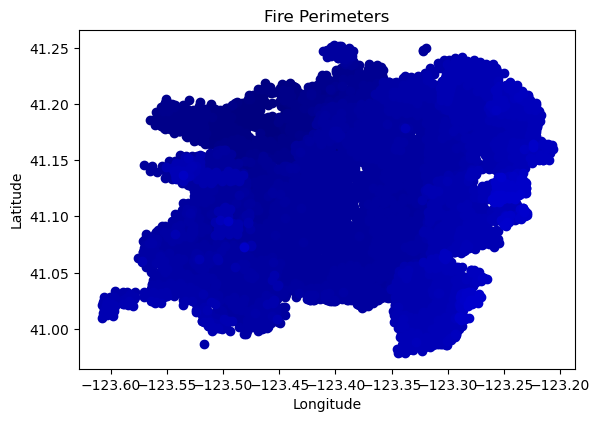

In [86]:
# newfirepix_gdf = gpd.read_file(gpkg_path, layer='newfirepix')

# Create a color map
num_rows = len(gdf_lf_FL)
colors = plt.cm.jet(np.linspace(0, 1, num_rows))

# Plot each row with a different color
fig, ax = plt.subplots()
for i,(idx, row )in enumerate(filtered_gdf.iterrows()):
    row_gdf = gpd.GeoDataFrame([row], columns=filtered_gdf.columns)
    row_gdf.plot(ax=ax, color=colors[i],label=f'Fireline {i+1}')
    

# Setting the title and labels
ax.set_title('Firelines')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()